In [5]:
!pip install --upgrade git+https://bitbucket.org/freemens/ion_sdk.git@master    
%env ALTERGO_FACTORY_API = https://staging.altergo.io/
%env ALTERGO_IOT_API = https://iot.staging.altergo.io/   

  Cloning https://bitbucket.org/freemens/ion_sdk.git (to revision master) to c:\users\gcoll\appdata\local\temp\pip-req-build-n3ds_5v3
env: ALTERGO_FACTORY_API=https://staging.altergo.io/
env: ALTERGO_IOT_API=https://iot.staging.altergo.io/


  Running command git clone -q https://bitbucket.org/freemens/ion_sdk.git 'C:\Users\gcoll\AppData\Local\Temp\pip-req-build-n3ds_5v3'


In [6]:
import pandas as pd
data = pd.read_csv('loudeac.csv')
import matplotlib.pyplot as plt
import ion_sdk.edison_api.edison_api as eapi
import datetime
from ion_sdk.edison_api.models.factoryModel import EdisonGenericComponent, Model,CurrentState

edApi=eapi.Client("f6ad4f7166814976b66b9cb346ebc5dd")


In [7]:
data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data=data.set_index('date')

In [8]:
print(data)

                     power
date                      
2021-10-07 00:00:00   0.50
2021-10-07 01:00:00   0.38
2021-10-07 02:00:00   0.25
2021-10-07 03:00:00   0.25
2021-10-07 04:00:00   0.25
...                    ...
2021-10-14 20:00:00   0.88
2021-10-14 21:00:00   1.00
2021-10-14 22:00:00   0.88
2021-10-14 23:00:00   0.63
2021-10-15 00:00:00   0.50

[193 rows x 1 columns]


In [9]:

serial = "loudeac"
asset=edApi.getAsset(serial)
print(asset)


EdisonComponent(id=321, serial_number='Loudeac', iot_data=IotData(id=258, last_update=Datetime(date=datetime.datetime(2021, 10, 15, 0, 0), timezone_type=3, timezone='UTC'), shadow='{"totalCount":153,"needRefresh":false,"refreshObj":[],"_id":"616fcf3cd4802700223a9ca5","sensorStatistics":[{"_id":"616fcf3cd4802700223a9ca6","componentId":321,"sensorId":13,"sensorCode":"twq","sensorPosition":"0","lastUpdate":1634256000000,"lastValue":0.5,"firstUpdate":1633564800000,"firstValue":0.5,"count":153,"createdAt":"2021-10-20T08:11:40.786Z","updatedAt":"2021-10-20T08:11:40.786Z"}],"componentId":321,"serialNumber":"Loudeac","lastUpdate":1634256000000,"firstUpdate":1633564800000,"createdAt":"2021-10-20T08:11:40.786Z","updatedAt":"2021-10-20T08:11:40.786Z"}', latitude=None, longitude=None), model=Model(id=19, name='City', is_configurable=False, configuration_type=None, view_template=None, category=Category(id=2, name='Battery'), image=Image(id=8, name=None, file='6cb4de0e83a961d58766f0ee3bcecc46.jpeg')

In [10]:

uploadSensorList=edApi.refactorDataframeToAsset(data,asset)
asset.df=data
edApi.updateSensorDataByFile(asset,uploadSensorList)


('Power', 100)

Preparing payload
Payload sent successfully! Checkout: https://staging.altergo.io/core/iot/connected_component/view/321/graph


In [11]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='date'>

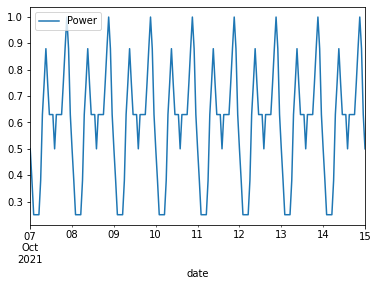

In [12]:
data.plot()